<a href="https://colab.research.google.com/github/GeorgeShmelin/Masterschool_time_series_Project_supermarket_favorita/blob/main/1_Project_supermarket_favorita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My idea behind the data download is - to use as much of the real time filtered data is it possible for reliable work of my free version of Google Colab. If one has a better computing possibilities - in this code clearly pointed the places for the personal data ammount adjastment. I came to my exact values empiricaly.

Dask doesn’t work directly with sklearn models — they expect regular pandas.

# Libraries

## General and SQL

In [ ]:
# !pip install kagglehub
import kagglehub

In [ ]:
import joblib # Save the DataFrame to a compressed file

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
import numpy as np
import pandas as pd
import sqlite3
import os
import gc

In [ ]:
import sqlalchemy as sa
from google.colab import files
from sqlalchemy import text
from sqlalchemy import create_engine

## Encodes

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Models

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Data Download

In [ ]:
# Download latest version
path = kagglehub.dataset_download("siliconx/favoritagrocerysalesforecastingextracted")

print("Path to dataset files:", path)

100%|██████████| 850M/850M [00:11<00:00, 77.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/siliconx/favoritagrocerysalesforecastingextracted/versions/1


https://www.kaggle.com/datasets/siliconx/favoritagrocerysalesforecastingextracted

In [ ]:
files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['train.csv', 'sample_submission.csv', 'oil.csv', 'items.csv', 'stores.csv', 'test.csv', 'holidays_events.csv', 'transactions.csv']


In [ ]:
del files

In [ ]:
# Connect to SQLite
conn = sqlite3.connect("favorita.db")

# Change this line per file
filename = 'oil.csv'
file_path = os.path.join(path, filename)

# Load CSV
df = pd.read_csv(file_path)
table_name = filename.replace('.csv', '')

# Load to SQL
df.to_sql(table_name, conn, if_exists="replace", index=False)
print(f"✅ Loaded '{filename}' into table '{table_name}'")

# Row count
query = f"SELECT COUNT(*) AS row_count FROM {table_name};"
row_count_df = pd.read_sql(query, conn)
row_count = row_count_df.iloc[0, 0]
print(f"🔢 Table '{table_name}' has {row_count:,} rows.")

# Inspect columns for key info
columns = df.columns.tolist()
primary_like = [col for col in columns if 'id' in col.lower() or 'nbr' in col.lower()]
date_like = [col for col in columns if 'date' in col.lower()]
possible_keys = primary_like + date_like

# Show candidate keys
if possible_keys:
    print(f"🔑 Candidate keys or join fields in '{table_name}': {possible_keys}")
else:
    print(f"ℹ️ No obvious join keys found in '{table_name}'")

✅ Loaded 'oil.csv' into table 'oil'
🔢 Table 'oil' has 1,218 rows.
🔑 Candidate keys or join fields in 'oil': ['date']


In [ ]:
# Change this line per file
filename = 'items.csv'
file_path = os.path.join(path, filename)

# Load CSV
df = pd.read_csv(file_path)
table_name = filename.replace('.csv', '')

# Load to SQL
df.to_sql(table_name, conn, if_exists="replace", index=False)
print(f"✅ Loaded '{filename}' into table '{table_name}'")

# Row count
query = f"SELECT COUNT(*) AS row_count FROM {table_name};"
row_count_df = pd.read_sql(query, conn)
row_count = row_count_df.iloc[0, 0]
print(f"🔢 Table '{table_name}' has {row_count:,} rows.")

# Inspect columns for key info
columns = df.columns.tolist()
primary_like = [col for col in columns if 'id' in col.lower() or 'nbr' in col.lower()]
date_like = [col for col in columns if 'date' in col.lower()]
possible_keys = primary_like + date_like

# Show candidate keys
if possible_keys:
    print(f"🔑 Candidate keys or join fields in '{table_name}': {possible_keys}")
else:
    print(f"ℹ️ No obvious join keys found in '{table_name}'")

✅ Loaded 'items.csv' into table 'items'
🔢 Table 'items' has 4,100 rows.
🔑 Candidate keys or join fields in 'items': ['item_nbr']


In [ ]:
# Change this line per file
filename = 'sample_submission.csv'
file_path = os.path.join(path, filename)

# Load CSV
df = pd.read_csv(file_path)
table_name = filename.replace('.csv', '')

# Load to SQL
df.to_sql(table_name, conn, if_exists="replace", index=False)
print(f"✅ Loaded '{filename}' into table '{table_name}'")

# Row count
query = f"SELECT COUNT(*) AS row_count FROM {table_name};"
row_count_df = pd.read_sql(query, conn)
row_count = row_count_df.iloc[0, 0]
print(f"🔢 Table '{table_name}' has {row_count:,} rows.")

# Inspect columns for key info
columns = df.columns.tolist()
primary_like = [col for col in columns if 'id' in col.lower() or 'nbr' in col.lower()]
date_like = [col for col in columns if 'date' in col.lower()]
possible_keys = primary_like + date_like

# Show candidate keys
if possible_keys:
    print(f"🔑 Candidate keys or join fields in '{table_name}': {possible_keys}")
else:
    print(f"ℹ️ No obvious join keys found in '{table_name}'")

✅ Loaded 'sample_submission.csv' into table 'sample_submission'
🔢 Table 'sample_submission' has 3,370,464 rows.
🔑 Candidate keys or join fields in 'sample_submission': ['id']


after a double check I found that not exist special "holidays" which affect only Guayas state

In [ ]:
# Change this line per file
filename = 'holidays_events.csv'
file_path = os.path.join(path, filename)

# Load CSV
df = pd.read_csv(file_path)
table_name = filename.replace('.csv', '')

# Load to SQL
df.to_sql(table_name, conn, if_exists="replace", index=False)
print(f"✅ Loaded '{filename}' into table '{table_name}'")

# Row count
query = f"SELECT COUNT(*) AS row_count FROM {table_name};"
row_count_df = pd.read_sql(query, conn)
row_count = row_count_df.iloc[0, 0]
print(f"🔢 Table '{table_name}' has {row_count:,} rows.")

# Inspect columns for key info
columns = df.columns.tolist()
primary_like = [col for col in columns if 'id' in col.lower() or 'nbr' in col.lower()]
date_like = [col for col in columns if 'date' in col.lower()]
possible_keys = primary_like + date_like

# Show candidate keys
if possible_keys:
    print(f"🔑 Candidate keys or join fields in '{table_name}': {possible_keys}")
else:
    print(f"ℹ️ No obvious join keys found in '{table_name}'")

✅ Loaded 'holidays_events.csv' into table 'holidays_events'
🔢 Table 'holidays_events' has 350 rows.
🔑 Candidate keys or join fields in 'holidays_events': ['date']


Loaded 'stores.csv' into table 'stores' (only state = 'Guayas')

In [ ]:
# Set up file
filename = 'stores.csv'
file_path = os.path.join(path, filename)

# Load and filter for Guayas
df = pd.read_csv(file_path)
df = df[df['state'] == 'Guayas']  # 👈 Filter

table_name = filename.replace('.csv', '')

# Save to SQL
df.to_sql(table_name, conn, if_exists="replace", index=False)
print(f"✅ Loaded '{filename}' into table '{table_name}' (only state = 'Guayas')")

# Row count
query = f"SELECT COUNT(*) AS row_count FROM {table_name};"
row_count_df = pd.read_sql(query, conn)
row_count = row_count_df.iloc[0, 0]
print(f"🔢 Table '{table_name}' has {row_count:,} rows.")

# Inspect columns for join keys
columns = df.columns.tolist()
primary_like = [col for col in columns if 'id' in col.lower() or 'nbr' in col.lower()]
date_like = [col for col in columns if 'date' in col.lower()]
possible_keys = primary_like + date_like

# Show candidate keys
if possible_keys:
    print(f"🔑 Candidate keys or join fields in '{table_name}': {possible_keys}")
else:
    print(f"ℹ️ No obvious join keys found in '{table_name}'")

✅ Loaded 'stores.csv' into table 'stores' (only state = 'Guayas')
🔢 Table 'stores' has 11 rows.
🔑 Candidate keys or join fields in 'stores': ['store_nbr']


In [ ]:
# Change this line per file
filename = 'test.csv'
file_path = os.path.join(path, filename)
table_name = filename.replace('.csv', '')

# Load CSV
df = pd.read_csv(file_path, parse_dates=['date'])

# ⏱️ Round date to nearest hour
df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.floor('H')

# Save to SQL
df.to_sql(table_name, conn, if_exists="replace", index=False)
print(f"✅ Loaded '{filename}' into table '{table_name}'")

# Row count
query = f"SELECT COUNT(*) AS row_count FROM {table_name};"
row_count = pd.read_sql(query, conn).iloc[0, 0]
print(f"🔢 Table '{table_name}' has {row_count:,} rows.")

# Inspect for join keys
columns = df.columns.tolist()
primary_like = [col for col in columns if 'id' in col.lower() or 'nbr' in col.lower()]
date_like = [col for col in columns if 'date' in col.lower()]
possible_keys = primary_like + date_like

if possible_keys:
    print(f"🔑 Candidate keys or join fields in '{table_name}': {possible_keys}")
else:
    print(f"ℹ️ No obvious join keys found in '{table_name}'")

<ipython-input-16-046f77298da3>:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.floor('H')


✅ Loaded 'test.csv' into table 'test'
🔢 Table 'test' has 3,370,464 rows.
🔑 Candidate keys or join fields in 'test': ['id', 'store_nbr', 'item_nbr', 'date']


In [ ]:
# Change this line per file
filename = 'transactions.csv'
file_path = os.path.join(path, filename)

# Load CSV
df = pd.read_csv(file_path)
table_name = filename.replace('.csv', '')

# Load to SQL
df.to_sql(table_name, conn, if_exists="replace", index=False)
print(f"✅ Loaded '{filename}' into table '{table_name}'")

# Row count
query = f"SELECT COUNT(*) AS row_count FROM {table_name};"
row_count_df = pd.read_sql(query, conn)
row_count = row_count_df.iloc[0, 0]
print(f"🔢 Table '{table_name}' has {row_count:,} rows.")

# Inspect columns for key info
columns = df.columns.tolist()
primary_like = [col for col in columns if 'id' in col.lower() or 'nbr' in col.lower()]
date_like = [col for col in columns if 'date' in col.lower()]
possible_keys = primary_like + date_like

# Show candidate keys
if possible_keys:
    print(f"🔑 Candidate keys or join fields in '{table_name}': {possible_keys}")
else:
    print(f"ℹ️ No obvious join keys found in '{table_name}'")

✅ Loaded 'transactions.csv' into table 'transactions'
🔢 Table 'transactions' has 83,488 rows.
🔑 Candidate keys or join fields in 'transactions': ['store_nbr', 'date']


In [ ]:
del possible_keys
del columns
del date_like
del primary_like
del df
del row_count_df
del query

### train.csv is a big in this dataset - like 125 million rows

In [ ]:
# Paths and file setup
filename = 'train.csv'
file_path = os.path.join(path, filename)
table_name = filename.replace('.csv', '')

# Date filter range
DATE_START = '2017-01-01'
DATE_END = '2018-12-31'

# Sampling + row cap
SAMPLE_RATIO = 0.01
MAX_ROWS = 100_000
total_saved_rows = 0

# Columns to keep from CSV
columns_to_keep = ['date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion']

In [ ]:
# Connect to SQLite
conn = sqlite3.connect("favorita.db")
cursor = conn.cursor()

# Check if the table exists
cursor.execute(f"SELECT name FROM sqlite_master WHERE type='table' AND name='{table_name}'")
table_exists = cursor.fetchone()

# If not exists, create it with correct schema
if not table_exists:
    create_sql = f"""
        CREATE TABLE {table_name} (
            date DATETIME,
            store_nbr INTEGER,
            item_nbr INTEGER,
            unit_sales REAL,
            onpromotion INTEGER
        )
    """
    conn.execute(create_sql)
    print(f"✅ Created table '{table_name}' with all expected columns")
else:
    # Validate column schema
    cursor.execute(f"PRAGMA table_info({table_name})")
    existing_columns = [col[1] for col in cursor.fetchall()]
    if 'onpromotion' not in existing_columns:
        try:
            conn.execute(f"ALTER TABLE {table_name} ADD COLUMN onpromotion INTEGER")
            print(f"➕ Added missing column 'onpromotion' to '{table_name}'")
        except sqlite3.OperationalError as e:
            print(f"⚠️ Could not alter table to add 'onpromotion': {e}")
    else:
        print(f"ℹ️ Table '{table_name}' exists and includes 'onpromotion'")

✅ Created table 'train' with all expected columns


In [ ]:
# Read CSV in chunks
chunks = pd.read_csv(file_path, chunksize=1_000_000, parse_dates=['date'])

for chunk in chunks:
    # Filter date
    chunk = chunk[(chunk['date'] >= DATE_START) & (chunk['date'] < DATE_END)]
    if chunk.empty:
        continue

    # Round to hour
    chunk['date'] = pd.to_datetime(chunk['date'], errors='coerce').dt.floor('H')

    # Ensure onpromotion column
    if 'onpromotion' not in chunk.columns:
        chunk['onpromotion'] = 0
    chunk['onpromotion'] = chunk['onpromotion'].fillna(False).astype('int8')  # Make it small

    # Downcast numerics
    chunk['store_nbr'] = pd.to_numeric(chunk['store_nbr'], downcast='integer')
    chunk['item_nbr'] = pd.to_numeric(chunk['item_nbr'], downcast='integer')
    chunk['unit_sales'] = pd.to_numeric(chunk['unit_sales'], downcast='float')

    # Try float16 if it fits (warning: less precise)
    if chunk['unit_sales'].max() < 65504:  # float16 upper limit
        chunk['unit_sales'] = chunk['unit_sales'].astype('float16')

    # Sample
    chunk = chunk.sample(frac=SAMPLE_RATIO, random_state=42)

    # Cap rows
    if total_saved_rows + len(chunk) > MAX_ROWS:
        chunk = chunk.iloc[:MAX_ROWS - total_saved_rows]

    # Keep only expected columns
    chunk = chunk[columns_to_keep]

    # Save
    chunk.to_sql(table_name, conn, if_exists='append', index=False)
    total_saved_rows += len(chunk)

    if total_saved_rows >= MAX_ROWS:
        break

print(f"✅ Loaded {total_saved_rows} rows into '{table_name}'")

<ipython-input-21-6059995e4f50>:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:
<ipython-input-21-6059995e4f50>:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  chunk['date'] = pd.to_datetime(chunk['date'], errors='coerce').dt.floor('H')
<ipython-input-21-6059995e4f50>:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  chunk['date'] = pd.to_datetime(chunk['date'], errors='coerce').dt.floor('H')
<ipython-input-21-6059995e4f50>:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  chunk['date'] = pd.to_datetime(chunk['date'], errors='coerce').dt.floor('H')
<ipython-input-21-6059995e4f50>:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  chunk['date'] = pd.to_datetime(chunk['date'], errors='coerce').dt.f

✅ Loaded 100000 rows into 'train'


<ipython-input-21-6059995e4f50>:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  chunk['date'] = pd.to_datetime(chunk['date'], errors='coerce').dt.floor('H')


In [ ]:
chunk['onpromotion'] = chunk['onpromotion'].fillna(False).astype('int8')
chunk['unit_sales'] = pd.to_numeric(chunk['unit_sales'], downcast='float')
if chunk['unit_sales'].max() < 65504:
    chunk['unit_sales'] = chunk['unit_sales'].astype('float16')

In [ ]:
del cursor

In [ ]:
# Row count
row_count = pd.read_sql(f"SELECT COUNT(*) AS row_count FROM {table_name}", conn).iloc[0, 0]
print(f"🔢 Table '{table_name}' has {row_count:,} rows.")

# Keys for join
sample = pd.read_sql(f"SELECT * FROM {table_name} LIMIT 5", conn)
columns = sample.columns.tolist()
keys = [col for col in columns if 'id' in col.lower() or 'nbr' in col.lower() or 'date' in col.lower()]
print(f"🔑 Candidate keys or join fields in '{table_name}': {keys}")

🔢 Table 'train' has 100,000 rows.
🔑 Candidate keys or join fields in 'train': ['date', 'store_nbr', 'item_nbr']


In [ ]:
row_count = sum(1 for _ in open(file_path)) - 1  # subtract 1 for header
print(f"🧮 train.csv has approximately {row_count:,} rows")

🧮 train.csv has approximately 125,497,040 rows


In [ ]:
del row_count
del sample
del keys
del columns

In [ ]:
# file_path = os.path.join(path, 'train.csv')
# size_bytes = os.path.getsize(file_path)
# ize_mb = size_bytes / (1024 * 1024)

# print(f"📦 train.csv size: {size_mb:.2f} MB")

In [ ]:
print(chunk.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
Index: 6888 entries, 111987231 to 111740474
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6888 non-null   datetime64[ns]
 1   store_nbr    6888 non-null   int8          
 2   item_nbr     6888 non-null   int32         
 3   unit_sales   6888 non-null   float16       
 4   onpromotion  6888 non-null   int8          
dtypes: datetime64[ns](1), float16(1), int32(1), int8(2)
memory usage: 161.4 KB
None


## From SQL to DataFrame

In [ ]:
database_connection_string = "sqlite:///favorita.db"  # Assuming the database file is named 'favorita.db'

# Create the engine
engine = sa.create_engine(database_connection_string)

### oil

In [ ]:
query_oil = """
  SELECT *
  FROM oil
"""

In [ ]:
df_oil = pd.read_sql_query(query_oil, engine)
df_oil.shape

(1218, 2)

In [ ]:
df_oil.sample(3)

,date,dcoilwtico
62,2013-03-28,97.24
1022,2016-12-01,51.08
974,2016-09-26,45.60


In [ ]:
del query_oil
del df_oil

### items

In [ ]:
query_items = """
  SELECT *
  FROM items
"""

In [ ]:
df_items = pd.read_sql_query(query_items, engine)
df_items.shape

(4100, 4)

In [ ]:
df_items.sample(2)

,item_nbr,family,class,perishable
2313,1404385,BEVERAGES,1124,0
3261,1955347,GROCERY I,1030,0


In [ ]:
del query_items
del df_items

### stores

In [ ]:
query_stores = """
  SELECT *
  FROM stores
"""

In [ ]:
df_stores = pd.read_sql_query(query_stores, engine) # only Guayas
df_stores.shape

(11, 5)

In [ ]:
df_stores.sample(2)

,store_nbr,city,state,type,cluster
3,28,Guayaquil,Guayas,E,10
2,27,Daule,Guayas,D,1


In [ ]:
del query_stores
del df_stores

### holidays_events

In [ ]:
query_holidays_events = """
  SELECT *
  FROM holidays_events
"""

In [ ]:
df_holidays_events = pd.read_sql_query(query_holidays_events, engine)
df_holidays_events.shape

(350, 6)

In [ ]:
df_holidays_events.sample(2)

,date,type,locale,locale_name,description,transferred
10,2012-07-03,Holiday,Local,Santo Domingo,Fundacion de Santo Domingo,0
85,2013-12-22,Additional,National,Ecuador,Navidad-3,0


In [ ]:
df_holidays_events["transferred"].nunique() # keep

2

In [ ]:
del query_holidays_events
del df_holidays_events

### transactions

In [ ]:
query_transactions = """
  SELECT *
  FROM transactions
"""

In [ ]:
df_transactions = pd.read_sql_query(query_transactions, engine)
df_transactions.shape

(83488, 3)

In [ ]:
df_transactions.sample(2)

,date,store_nbr,transactions
22790,2014-05-07,36,1007
23146,2014-05-15,19,969


In [ ]:
del query_transactions
del df_transactions

### sample_submission

In [ ]:
query_sample_submission = """
  SELECT *
  FROM sample_submission
"""

In [ ]:
df_sample_submission = pd.read_sql_query(query_sample_submission, engine)
df_sample_submission.shape

(3370464, 2)

In [ ]:
df_sample_submission.sample(2)

,id,unit_sales
3290293,128787333,0
2880119,128377159,0


In [ ]:
df_sample_submission["unit_sales"].nunique()

1

In [ ]:
del query_sample_submission
del df_sample_submission

### test

In [ ]:
query_test_only = """
  SELECT *
  FROM test
"""

In [ ]:
df_test_only = pd.read_sql_query(query_test_only, engine)
df_test_only.shape

(3370464, 5)

In [ ]:
df_test_only.sample(2)

,id,date,store_nbr,item_nbr,onpromotion
3333647,128830687,2017-08-31 00:00:00,45,1400328,0
2430383,127927423,2017-08-27 00:00:00,30,123927,0


In [ ]:
df_test_only["date"] = pd.to_datetime(df_test_only["date"], errors='coerce').dt.date

In [ ]:
print("🕓 Min date:", df_test_only["date"].min())
print("🕔 Max date:", df_test_only["date"].max())

🕓 Min date: 2017-08-16
🕔 Max date: 2017-08-31


In [ ]:
df_test_only.sample(2)

,id,date,store_nbr,item_nbr,onpromotion
2824944,128321984,2017-08-29,23,554047,0
450248,125947288,2017-08-18,8,1146802,0


In [ ]:
del query_test_only
del df_test_only

In [ ]:
gc.collect() # gc.collect() are for garbage collection — basically cleaning up memory that Python no longer needs

17

If I would delete all "oil" 0 values before my download from SQL - I may miss some of my "holidays" values

In [ ]:
query_test = """
WITH top_families AS (
    SELECT items.family
    FROM train
    JOIN items ON train.item_nbr = items.item_nbr
    WHERE train.unit_sales >= 0
    GROUP BY items.family
    ORDER BY SUM(train.unit_sales) DESC
    LIMIT 3
)

SELECT
    test.date AS test_date,
    test.store_nbr,
    test.item_nbr,
    test.onpromotion,
    sample_submission.unit_sales,
    oil.dcoilwtico,
    holidays_events.type AS holiday_type,
    holidays_events.locale,
    holidays_events.transferred,
    stores.city,
    stores.type AS store_type,
    stores.cluster AS store_cluster,
    items.family AS items_family,
    items.class AS item_class,
    items.perishable AS perishable_items,
    transactions.transactions

FROM test

-- Historical unit sales for same store/item/date (if available)
LEFT JOIN train
  ON test.store_nbr = train.store_nbr
  AND test.item_nbr = train.item_nbr
  AND DATE(test.date) = DATE(train.date)

LEFT JOIN oil
  ON DATE(test.date) = DATE(oil.date)

LEFT JOIN sample_submission
  ON test.id = sample_submission.id

LEFT JOIN holidays_events
  ON DATE(test.date) = DATE(holidays_events.date)

LEFT JOIN stores
  ON test.store_nbr = stores.store_nbr

LEFT JOIN items
  ON test.item_nbr = items.item_nbr

LEFT JOIN transactions
  ON DATE(test.date) = DATE(transactions.date)
     AND test.store_nbr = transactions.store_nbr

-- ✅ Only keep top 3 families
WHERE items.family IN (SELECT family FROM top_families)

LIMIT 25000;
"""

In [ ]:
df_test_download = pd.read_sql_query(query_test, engine)
df_test = df_test_download.copy()
df_test.shape

(25000, 16)

In [ ]:
# Save the DataFrame to a compressed file
joblib.dump(df_test_download, 'df_test_download.joblib.gz', compress=('gzip', 3))

# You can load it back later like this:
# df_test_download = joblib.load('df_test_download.joblib.gz')

['df_test_download.joblib.gz']

after a doble check I found that my items' purchase time is not in minutes or hours, for saving the data size I will reduce df_test["test date"] also df_train["train_date"] to days

In [ ]:
df_test["test_date"] = pd.to_datetime(df_test["test_date"], errors='coerce').dt.date

In [ ]:
df_test["onpromotion"] = df_test["onpromotion"].fillna(False).astype('bool')
df_test["onpromotion"] = df_test["onpromotion"].astype('int8')

I add a column "weekday" so it should be easier analise "holidays" influence

In [ ]:
df_test["test_date"] = pd.to_datetime(df_test["test_date"], errors='coerce')
df_test["weekday"] = df_test["test_date"].dt.weekday

some of the cleaning comes from the later one done on df_train data

In [ ]:
df_test["store_cluster"] = df_test["store_cluster"].fillna(0).astype('int8')

<ipython-input-70-abfcd4d6f004>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test["store_cluster"] = df_test["store_cluster"].fillna(0).astype('int8')


In [ ]:
df_test["transferred"] = df_test["transferred"].fillna(False).astype('bool')
df_test["transferred"] = df_test["transferred"].astype('int8')

<ipython-input-71-6b718e39fbf4>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test["transferred"] = df_test["transferred"].fillna(False).astype('bool')


In [ ]:
# Fill NaN in 'dcoilwtico' (oil price) with previous available value
df_test['dcoilwtico'] = df_test['dcoilwtico'].fillna(method='ffill').fillna(method='bfill')

<ipython-input-72-53e2b53091cc>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_test['dcoilwtico'] = df_test['dcoilwtico'].fillna(method='ffill').fillna(method='bfill')


In [ ]:
df_test.sample(3)

,test_date,store_nbr,item_nbr,onpromotion,unit_sales,dcoilwtico,holiday_type,locale,transferred,city,store_type,store_cluster,items_family,item_class,perishable_items,transactions,weekday
14748,2017-08-16,7,2026501,0,0,46.8,None,None,0,None,None,0,GROCERY I,1034,0,None,2
23891,2017-08-16,12,559682,0,0,46.8,None,None,0,None,None,0,GROCERY I,1086,0,None,2
18376,2017-08-16,9,1473476,1,0,46.8,None,None,0,None,None,0,PRODUCE,2004,1,None,2


In [ ]:
for col in df_test.select_dtypes(include=['int64']).columns:
    df_test[col] = pd.to_numeric(df_test[col], downcast='integer')

### train

In [ ]:
query_train = """
WITH top_families AS (
    SELECT items.family
    FROM train
    JOIN items ON train.item_nbr = items.item_nbr
    WHERE train.unit_sales >= 0
    GROUP BY items.family
    ORDER BY SUM(train.unit_sales) DESC
    LIMIT 3
)

SELECT
    train.unit_sales,
    train.date AS train_date,
    train.store_nbr,
    train.item_nbr,
    train.onpromotion,

    oil.dcoilwtico,

    holidays_events.type AS holiday_type,
    holidays_events.locale,
    holidays_events.transferred,

    stores.city,
    stores.type AS store_type,
    stores.cluster AS store_cluster,

    items.family AS items_family,
    items.class AS item_class,
    items.perishable AS perishable_items,

    transactions.transactions

FROM train
LEFT JOIN oil
  ON DATE(train.date) = DATE(oil.date)
LEFT JOIN holidays_events
  ON DATE(train.date) = DATE(holidays_events.date)
LEFT JOIN stores
  ON train.store_nbr = stores.store_nbr
LEFT JOIN items
  ON train.item_nbr = items.item_nbr
LEFT JOIN transactions
  ON DATE(train.date) = DATE(transactions.date)
     AND train.store_nbr = transactions.store_nbr

WHERE train.unit_sales >= 0
  AND items.family IN (SELECT family FROM top_families)

LIMIT 100000;
"""

In [ ]:
df_train_download = pd.read_sql_query(query_train, engine)
df_train = df_train_download.copy()
df_train.shape

(58312, 16)

In [ ]:
# Save the DataFrame to a compressed file
joblib.dump(df_train_download, 'df_train_download.joblib.gz', compress=('gzip', 3))

# You can load it back later like this:
# df_train_download = joblib.load('df_train_download.joblib.gz')

['df_train_download.joblib.gz']

In [ ]:
df_train["train_date"] = pd.to_datetime(df_train["train_date"], errors='coerce').dt.date

In [ ]:
df_train["onpromotion"] = df_train["onpromotion"].fillna(False).astype('bool')
df_train["onpromotion"] = df_train["onpromotion"].astype('int8')

In [ ]:
df_train["train_date"] = pd.to_datetime(df_train["train_date"], errors='coerce')
df_train["weekday"] = df_train["train_date"].dt.weekday

In [ ]:
df_train['unit_sales'] = df_train['unit_sales'].fillna(0)

In [ ]:
df_train.sample(3)

,unit_sales,train_date,store_nbr,item_nbr,onpromotion,dcoilwtico,holiday_type,locale,transferred,city,store_type,store_cluster,items_family,item_class,perishable_items,transactions,weekday
33649,11.0,2017-02-25,39,1949898,0,NaN,None,None,NaN,None,None,NaN,GROCERY I,1026,0,1783,5
40938,2.0,2017-03-06,23,361502,0,53.19,None,None,NaN,None,None,NaN,GROCERY I,1036,0,918,0
4148,1.0,2017-01-11,28,1975527,0,52.19,None,None,NaN,Guayaquil,E,10.0,GROCERY I,1034,0,1043,2


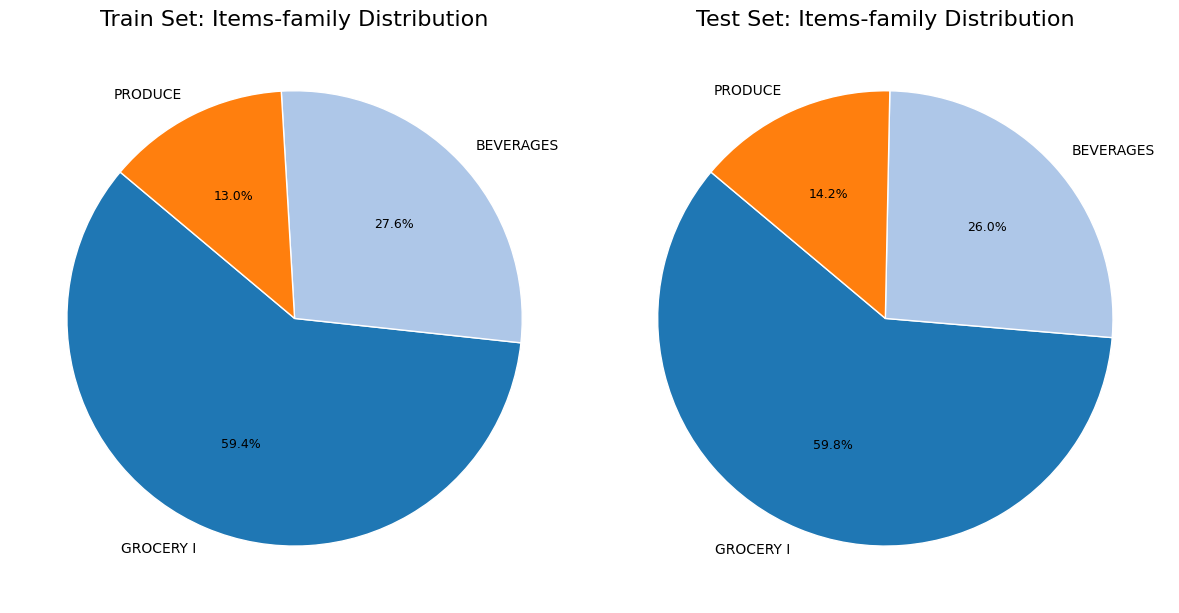

In [ ]:
# Group by items_family
family_counts_train = df_train['items_family'].value_counts()
family_counts_test = df_test['items_family'].value_counts()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

colors = plt.cm.tab20.colors  # Nice colormap

# Train pie chart
patches1, texts1, autotexts1 = axes[0].pie(
    family_counts_train,
    labels=family_counts_train.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
axes[0].set_title('Train Set: Items-family Distribution', fontsize=16)

# Test pie chart
patches2, texts2, autotexts2 = axes[1].pie(
    family_counts_test,
    labels=family_counts_test.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title('Test Set: Items-family Distribution', fontsize=16)

# Text styling
for texts in [texts1, texts2]:
    for text in texts:
        text.set_fontsize(10)
for autotexts in [autotexts1, autotexts2]:
    for autotext in autotexts:
        autotext.set_fontsize(9)

plt.tight_layout()
plt.show()

In [ ]:
del family_counts_train
del family_counts_test

In [ ]:
print(df_train["onpromotion"].nunique())
print(df_train["onpromotion"].value_counts())

2
onpromotion
0    53469
1     4843
Name: count, dtype: int64


In [ ]:
print(df_train["store_nbr"].nunique())
print(df_train["store_nbr"].isnull().sum())
# print(df_train["store_nbr"].value_counts())

53
0


In [ ]:
print(df_train["holiday_type"].nunique())
print(df_train["holiday_type"].value_counts())
print(df_train["holiday_type"].isnull().sum())

2
holiday_type
Holiday     2331
Transfer     668
Name: count, dtype: int64
55313


In [ ]:
print(df_train["locale"].nunique())
print(df_train["locale"].value_counts())
print(df_train["locale"].isnull().sum())

3
locale
National    1888
Local        642
Regional     469
Name: count, dtype: int64
55313


In [ ]:
df_train["transferred"] = df_train["transferred"].fillna(False).astype('bool')
df_train["transferred"] = df_train["transferred"].astype('int8')

In [ ]:
print(df_train["transferred"].nunique())
print(df_train["transferred"].value_counts())
print(df_train["transferred"].isnull().sum())

2
transferred
0    58301
1       11
Name: count, dtype: int64
0


In [ ]:
print(df_train["city"].nunique())
print(df_train["city"].value_counts())
print(df_train["city"].isnull().sum())

4
city
Guayaquil    7767
Daule        1167
Libertad     1024
Playas        682
Name: count, dtype: int64
47672


In [ ]:
print(df_train["store_type"].nunique())
print(df_train["store_type"].value_counts())
print(df_train["store_type"].isnull().sum())

5
store_type
E    3160
D    3124
C    2074
A    1306
B     976
Name: count, dtype: int64
47672


In [ ]:
df_train["store_cluster"] = df_train["store_cluster"].fillna(0).astype('int8')

In [ ]:
print(df_train["store_cluster"].nunique())
print(df_train["store_cluster"].value_counts())
print(df_train["store_cluster"].isnull().sum())

6
store_cluster
0     47672
10     3921
1      2363
3      2074
17     1306
6       976
Name: count, dtype: int64
0


In [ ]:
print(df_train["items_family"].nunique())
print(df_train["items_family"].value_counts())
print(df_train["items_family"].isnull().sum())

3
items_family
GROCERY I    34638
BEVERAGES    16118
PRODUCE       7556
Name: count, dtype: int64
0


In [ ]:
print(df_train["item_class"].nunique())
print(df_train["item_class"].value_counts())
print(df_train["item_class"].isnull().sum())

103
item_class
1016    3384
1040    3370
1124    2704
1034    2477
1122    2303
        ... 
1029       4
1153       3
1150       2
1154       2
1046       1
Name: count, Length: 103, dtype: int64
0


In [ ]:
print(df_train["perishable_items"].nunique())
print(df_train["perishable_items"].value_counts())
print(df_train["perishable_items"].isnull().sum())

2
perishable_items
0    50756
1     7556
Name: count, dtype: int64
0


In [ ]:
# Create a weight column
df_train['weight'] = 1.0  # default weight for non-perishable

# Increase weight for perishable items
df_train.loc[df_train['perishable_items'] == 1, 'weight'] = 1.5

In [ ]:
print(df_train["transactions"].nunique())
print(df_train["transactions"].value_counts())
print(df_train["transactions"].isnull().sum())

2312
transactions
1380    119
1180    117
1348    110
1355    106
1278    106
       ... 
352       2
413       2
452       2
2300      1
622       1
Name: count, Length: 2312, dtype: int64
0


In [ ]:
print(df_train["weekday"].nunique())
print(df_train["weekday"].value_counts())
print(df_train["weekday"].isnull().sum())

7
weekday
5    8709
6    8484
0    8460
4    8322
1    8244
2    8115
3    7978
Name: count, dtype: int64
0


In [ ]:
for col in df_train.select_dtypes(include=['int64']).columns:
    df_train[col] = pd.to_numeric(df_train[col], downcast='integer')

In [ ]:
# Fill NaN in 'dcoilwtico' (oil price) with previous available value
df_train['dcoilwtico'] = df_train['dcoilwtico'].fillna(method='ffill').fillna(method='bfill')

<ipython-input-102-9c7d44bb2d08>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train['dcoilwtico'] = df_train['dcoilwtico'].fillna(method='ffill').fillna(method='bfill')


Theo original idea of this Kaggel code-prediction was that Equador is oil exporting country and high/low oil price significanly influence shopping activity/spending confidence

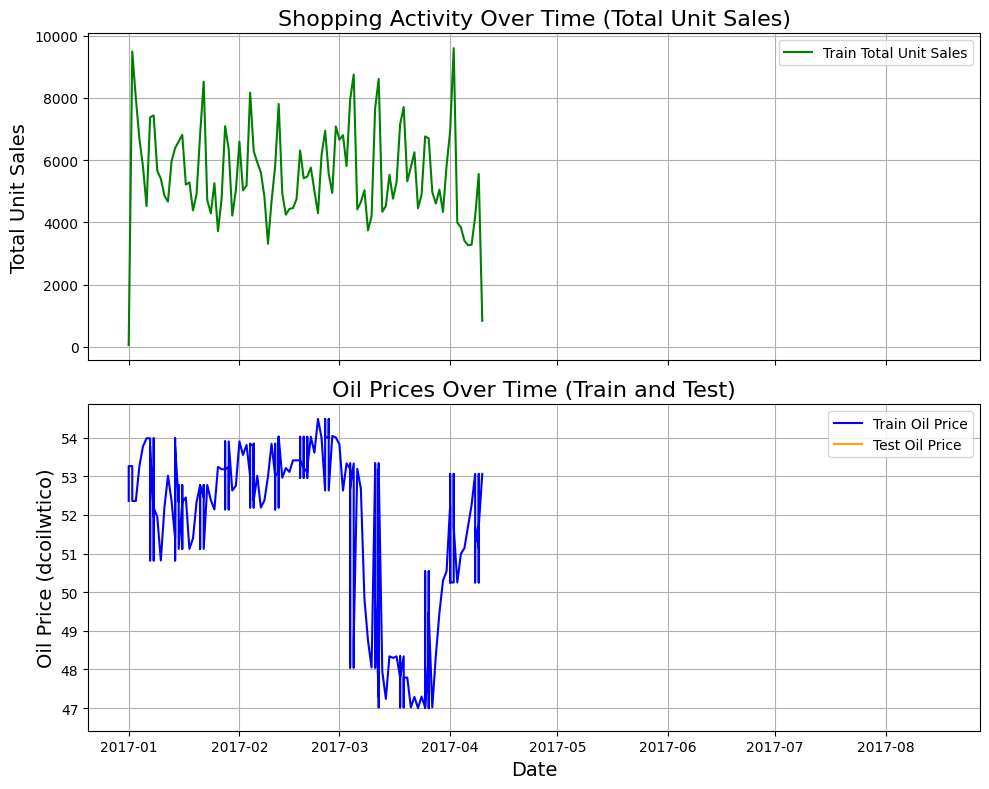

In [ ]:
# Make sure dates are in datetime format
df_train['train_date'] = pd.to_datetime(df_train['train_date'])
df_test['test_date'] = pd.to_datetime(df_test['test_date'])

# Sort by date
df_train = df_train.sort_values('train_date')
df_test = df_test.sort_values('test_date')

# Group unit_sales per day
sales_per_day = df_train.groupby('train_date')['unit_sales'].sum()

# Create two vertically stacked plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Top plot: Shopping activity
ax1.plot(sales_per_day.index, sales_per_day.values, color='green', label='Train Total Unit Sales')
ax1.set_title('Shopping Activity Over Time (Total Unit Sales)', fontsize=16)
ax1.set_ylabel('Total Unit Sales', fontsize=14)
ax1.legend()
ax1.grid(True)

# Bottom plot: Oil prices
ax2.plot(df_train['train_date'], df_train['dcoilwtico'], label='Train Oil Price', color='blue')
ax2.plot(df_test['test_date'], df_test['dcoilwtico'], label='Test Oil Price', color='orange')
ax2.set_title('Oil Prices Over Time (Train and Test)', fontsize=16)
ax2.set_xlabel('Date', fontsize=14)
ax2.set_ylabel('Oil Price (dcoilwtico)', fontsize=14)
ax2.legend()
ax2.grid(True)

# Layout adjustment
plt.tight_layout()
plt.show()

In [ ]:
df_train.sample(3)

,unit_sales,train_date,store_nbr,item_nbr,onpromotion,dcoilwtico,holiday_type,locale,transferred,city,store_type,store_cluster,items_family,item_class,perishable_items,transactions,weekday,weight
1766,5.0,2017-01-03,17,364832,0,52.36,None,None,0,None,None,0,GROCERY I,1040,0,1760,1,1.0
51914,1.0,2017-03-31,40,211206,0,50.54,None,None,0,None,None,0,GROCERY I,1072,0,1379,4,1.0
56540,21.0,2017-04-06,46,2043261,1,51.69,None,None,0,None,None,0,GROCERY I,1094,0,2896,3,1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/MasterSchool/MasterSchool_Python/Time_Series/Time_series_project/df_train.csv'
df_train.to_csv(file_path, index=False)

In [ ]:
df_enc = df_train.copy() # encoded
df_enc.shape

(58312, 18)

In [ ]:
# Save the DataFrame to a compressed file
# joblib.dump(df_train, 'df_train.joblib.gz', compress=('gzip', 3))

In [ ]:
gc.collect() # gc.collect() are for garbage collection — basically cleaning up memory that Python no longer needs

18

# Data Preparation

## cleaning and encoding

### Z-score 2%

In [ ]:
# Function to calculate Z-score 2% for each group (store-item combination)
def calculate_store_item_zscore(group):
    # Compute mean and standard deviation for each store-item group
    mean_sales = group['unit_sales'].mean()
    std_sales = group['unit_sales'].std()

    # Calculate Z-score (avoiding division by zero for standard deviation)
    group['z_score'] = (group['unit_sales'] - mean_sales) / (std_sales if std_sales != 0 else 1)
    return group

# Apply the Z-score calculation to each store-item group without resetting the index
df_enc_grouped = df_train.groupby(['store_nbr', 'item_nbr']).apply(calculate_store_item_zscore)
df_enc_grouped.reset_index(drop=True, inplace=True)

# Define threshold for outliers (e.g., Z-score > 2)
outliers = df_enc_grouped[df_enc_grouped['z_score'] > 2]

# Print summary
print(f"Number of outliers detected: {len(outliers)}")
del df_enc_grouped

Number of outliers detected: 1


<ipython-input-109-a9d8101e8a1b>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_enc_grouped = df_train.groupby(['store_nbr', 'item_nbr']).apply(calculate_store_item_zscore)


### target unit_sales — it’s a continuous numerical value

Log transform it to stabilize variance (because sales can have huge spikes)

In [ ]:
df_enc['unit_sales_log'] = np.log1p(df_enc['unit_sales'])

In [ ]:
# preds = np.expm1(model_predictions) after prediction you can reverse transform

### dates

In [ ]:
df_enc['month'] = df_enc['train_date'].dt.month
df_enc['day_of_month'] = df_enc['train_date'].dt.day
df_enc['year'] = df_enc['train_date'].dt.year

In [ ]:
df_enc['year'] = df_enc['year'] - df_enc['year'].min()

### store_nbr

nothig

## item_nbr

In [ ]:
le = LabelEncoder()
df_enc['item_nbr'] = le.fit_transform(df_enc['item_nbr'])
df_enc['item_nbr'] = df_enc['item_nbr'].astype('uint32')

## onpromotion

nothing

## dcoilwtico

In [ ]:
scaler = StandardScaler()
df_enc['dcoilwtico_scaled'] = scaler.fit_transform(df_enc[['dcoilwtico']])

## 	holiday_type

In [ ]:
# One-hot encode 'holiday_type', treating NaNs as a separate category
holiday_dummies = pd.get_dummies(df_enc['holiday_type'], prefix='holiday', dummy_na=True)

# Concatenate back to df_enc
df_enc = pd.concat([df_enc, holiday_dummies], axis=1)

# Force all holiday_* columns to be 0/1 integers
for col in holiday_dummies.columns:
    df_enc[col] = df_enc[col].astype(int)

# (Optional) Drop the original column if I want
# df_enc.drop('holiday_type', axis=1, inplace=True)

## locale

In [ ]:
locale_dummies = pd.get_dummies(df_enc['locale'], prefix='locale', dummy_na=True)
df_enc = pd.concat([df_enc, locale_dummies], axis=1)

for col in locale_dummies.columns:
    df_enc[col] = df_enc[col].astype(int)

## city

In [ ]:
city_dummies = pd.get_dummies(df_enc['city'], prefix='city', dummy_na=True)
df_enc = pd.concat([df_enc, city_dummies], axis=1)

for col in city_dummies.columns:
    df_enc[col] = df_enc[col].astype(int)

## store_type

In [ ]:
store_type_dummies = pd.get_dummies(df_enc['store_type'], prefix='store_type', dummy_na=True)
df_enc = pd.concat([df_enc, store_type_dummies], axis=1)

for col in store_type_dummies.columns:
    df_enc[col] = df_enc[col].astype(int)

## 	store_cluster

In [ ]:
store_cluster_dummies = pd.get_dummies(df_enc['store_cluster'], prefix='store_cluster', dummy_na=True)
df_enc = pd.concat([df_enc, store_cluster_dummies], axis=1)

for col in store_cluster_dummies.columns:
    df_enc[col] = df_enc[col].astype(int)

## items_family

In [ ]:
items_family_dummies = pd.get_dummies(df_enc['items_family'], prefix='items_family', dummy_na=True)
df_enc = pd.concat([df_enc, items_family_dummies], axis=1)

for col in items_family_dummies.columns:
    df_enc[col] = df_enc[col].astype(int)

## perishable_items

nothing

## transferred

nothing

## item_class

no perfect decision - nothing

## transactions

In [ ]:
scaler = MinMaxScaler()
df_enc['transactions'] = scaler.fit_transform(df_enc[['transactions']])

## weekday

nothing

### Drop all the columns I don’t want at once, but keep them safely aside

In [ ]:
# List of columns I want to temporarily remove
columns_to_hide = ['item_nbr', 'unit_sales', 'dcoilwtico', 'holiday_type', 'locale', 'city', 'store_type', 'items_family']

# 1️⃣ Save the columns separately
hidden_data = df_enc[columns_to_hide].copy()

# 2️⃣ Drop them from df_enc (now df_enc has only working features)
df_enc = df_enc.drop(columns=columns_to_hide)

# 3️⃣ If later you want to restore:
# df_enc = pd.concat([df_enc, hidden_data], axis=1)

## Drop about 5% combine of most “outlier” points based on distance

Use KNN to 3% find “weird” points — points far from their 10 nearest neighbors

In [ ]:
# Step 1: Prepare
X_target = df_enc[['unit_sales_log']].values  # Needs 2D for KNN

# Step 2: Fit Nearest Neighbors
knn = NearestNeighbors(n_neighbors=10)
knn.fit(X_target)

# Step 3: Find average distance to neighbors
distances, _ = knn.kneighbors(X_target)
avg_distances = distances.mean(axis=1)

# Step 4: Define threshold to drop top 3% largest distances (biggest outliers)
threshold = np.percentile(avg_distances, 97)

# Step 5: Keep only points below the threshold
mask = avg_distances < threshold
df_enc_cleaned = df_enc[mask].reset_index(drop=True)

print(f"✅ Outliers removed. New shape: {df_enc_cleaned.shape}")

✅ Outliers removed. New shape: (56561, 44)


In [ ]:
df_model = df_enc_cleaned.copy()

In [ ]:
# Save the DataFrame to a compressed file
# joblib.dump(df_enc, 'df_enc.joblib.gz', compress=('gzip', 3))
# joblib.dump(df_enc_cleaned, 'df_enc_cleaned.joblib.gz', compress=('gzip', 3))

In [ ]:
gc.collect() # gc.collect() are for garbage collection — basically cleaning up memory that Python no longer needs

0

In [ ]:
df_model.sample(3)

,train_date,store_nbr,onpromotion,transferred,store_cluster,item_class,perishable_items,transactions,weekday,weight,...,store_cluster_1.0,store_cluster_3.0,store_cluster_6.0,store_cluster_10.0,store_cluster_17.0,store_cluster_nan,items_family_BEVERAGES,items_family_GROCERY I,items_family_PRODUCE,items_family_nan
32594,2017-02-26,19,0,0,0,1058,0,0.143281,6,1.0,...,0,0,0,0,0,0,0,1,0,0
33022,2017-02-26,9,0,0,0,1028,0,0.286736,6,1.0,...,0,0,0,0,0,0,0,1,0,0
25333,2017-02-13,51,0,0,17,1120,0,0.271902,0,1.0,...,0,0,0,0,1,0,1,0,0,0


# EDA

This Random Forest shows only very general feature importance tendency, as the most influential feature "transactions" was taken out

✅ Mean Absolute Error: 0.6168
✅ R² Score: 0.2061


<ipython-input-129-f0d99edc45a4>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_features.index, palette="viridis")


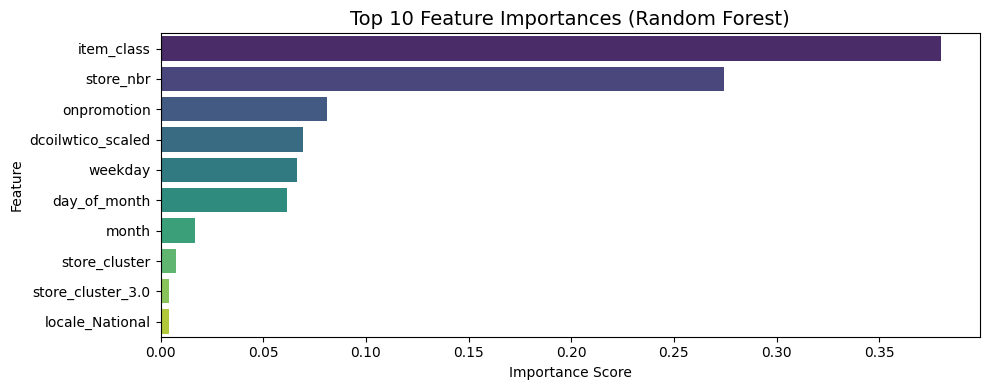

In [ ]:
# 1. Features (X) and Target (y)
# Drop target, and ONLY columns that are present
X = df_model.drop(columns=["unit_sales_log", "train_date", "transactions"])
y = df_model["unit_sales_log"]                 # Target

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=42
)

# 3. Random Forest Regressor
regressor = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
regressor.fit(X_train, y_train)

# 4. Predictions and Evaluation
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Mean Absolute Error: {mae:.4f}")
print(f"✅ R² Score: {r2:.4f}")

# 5. Feature Importances
feature_importance = pd.Series(regressor.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)

# 6. Plotting
plt.figure(figsize=(10, 4))
sns.barplot(x=top_features, y=top_features.index, palette="viridis")
plt.title("Top 10 Feature Importances (Random Forest)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## 7-day rolling mean 'item_class'

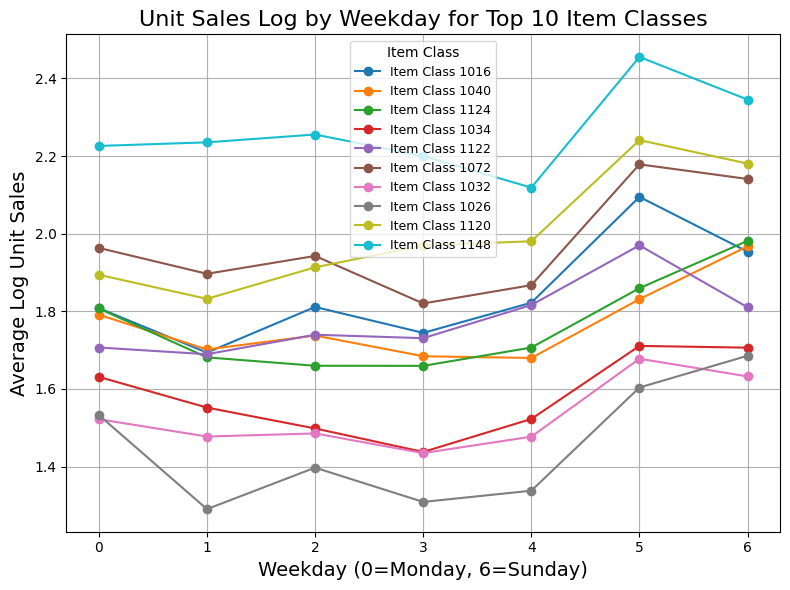

In [ ]:
# 1. Find top 10 item_class based on counts
top_item_classes = df_model['item_class'].value_counts().head(10).index

# 2. Filter df_model to keep only top item_class
df_top_items = df_model[df_model['item_class'].isin(top_item_classes)]

# 3. Sort by weekday for nice plots
df_top_items = df_top_items.sort_values('weekday')

# 4. Plot
plt.figure(figsize=(8, 6))

for item_class in top_item_classes:
    item_data = df_top_items[df_top_items['item_class'] == item_class]

    # Group by weekday and calculate mean unit_sales_log
    weekday_sales = item_data.groupby('weekday')['unit_sales_log'].mean()

    # Apply 7-point rolling mean (but since only weekdays (0-6), not truly 7 days, so we skip rolling)
    # Just plot directly
    plt.plot(weekday_sales.index, weekday_sales.values, label=f'Item Class {item_class}', marker='o')

# Styling
plt.title('Unit Sales Log by Weekday for Top 10 Item Classes', fontsize=16)
plt.xlabel('Weekday (0=Monday, 6=Sunday)', fontsize=14)
plt.ylabel('Average Log Unit Sales', fontsize=14)
plt.legend(title='Item Class', fontsize=9)
plt.grid(True)
plt.tight_layout()

del df_top_items

plt.show()

Expending Window

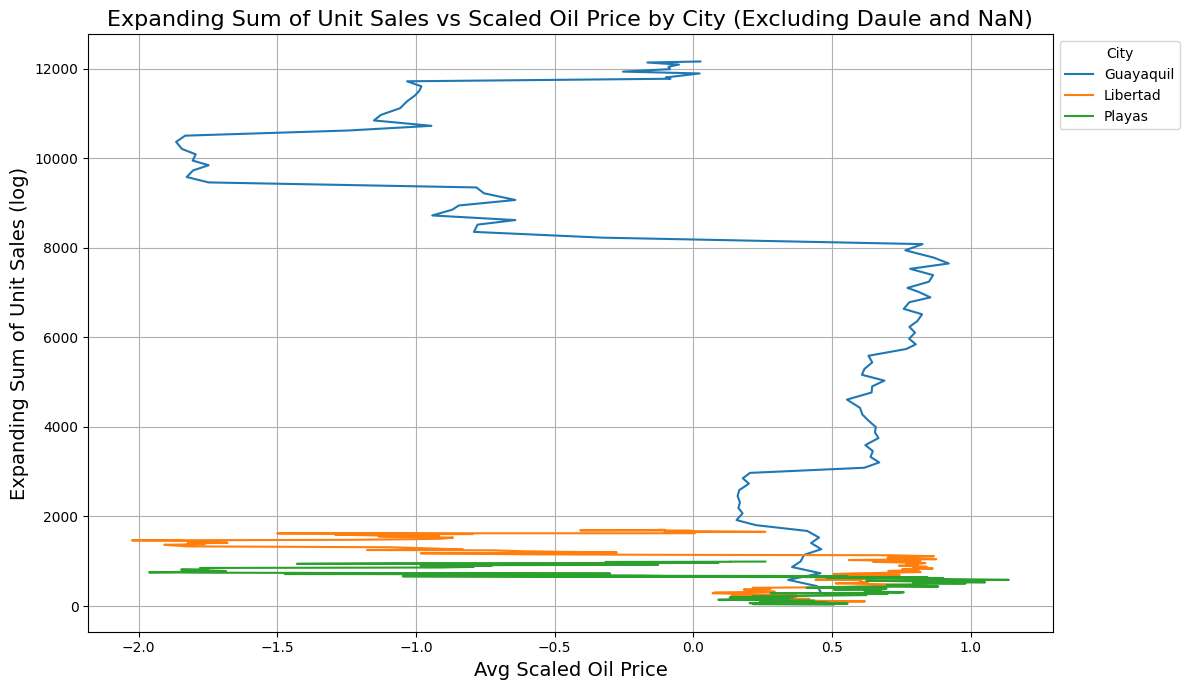

In [ ]:
# 1. Recover 'city' columns (already one-hot encoded)
city_columns = [col for col in df_model.columns if col.startswith('city_')]

# 2. Remove 'city_Daule' and 'city_nan' from the list
excluded_cities = ['city_Daule', 'city_nan']
city_columns = [col for col in city_columns if col not in excluded_cities]

# 3. Set up the plot
plt.figure(figsize=(12, 7))

# 4. Loop through each city (excluding Daule and NaN city)
for city_col in city_columns:
    # Select only rows where this city is active
    city_data = df_model[df_model[city_col] == 1]

    # Sort by original index (since train_date was hidden)
    city_data = city_data.sort_index()

    # Recover 'train_date' from original df_train
    city_data['train_date'] = df_train.loc[city_data.index, 'train_date']

    # Group by train_date and sum unit_sales_log
    date_grouped_sales = city_data.groupby('train_date')["unit_sales_log"].sum()

    # Apply expanding sum (with minimum 3 periods)
    expanding_sum_sales = date_grouped_sales.expanding(3).sum()

    # For x-axis: average oil price by date
    date_grouped_oil = city_data.groupby('train_date')["dcoilwtico_scaled"].mean()

    # Match indexes
    common_index = expanding_sum_sales.index.intersection(date_grouped_oil.index)

    # Plot oil price (X-axis) vs expanding sales sum (Y-axis)
    plt.plot(date_grouped_oil.loc[common_index], expanding_sum_sales.loc[common_index], label=city_col.replace('city_', ''))

# 5. Styling
plt.title('Expanding Sum of Unit Sales vs Scaled Oil Price by City (Excluding Daule and NaN)', fontsize=16)
plt.xlabel('Avg Scaled Oil Price', fontsize=14)
plt.ylabel('Expanding Sum of Unit Sales (log)', fontsize=14)
plt.legend(title='City', fontsize=10, loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True)
plt.tight_layout()

del city_columns, excluded_cities, city_data, date_grouped_sales, expanding_sum_sales, date_grouped_oil, common_index

plt.show()

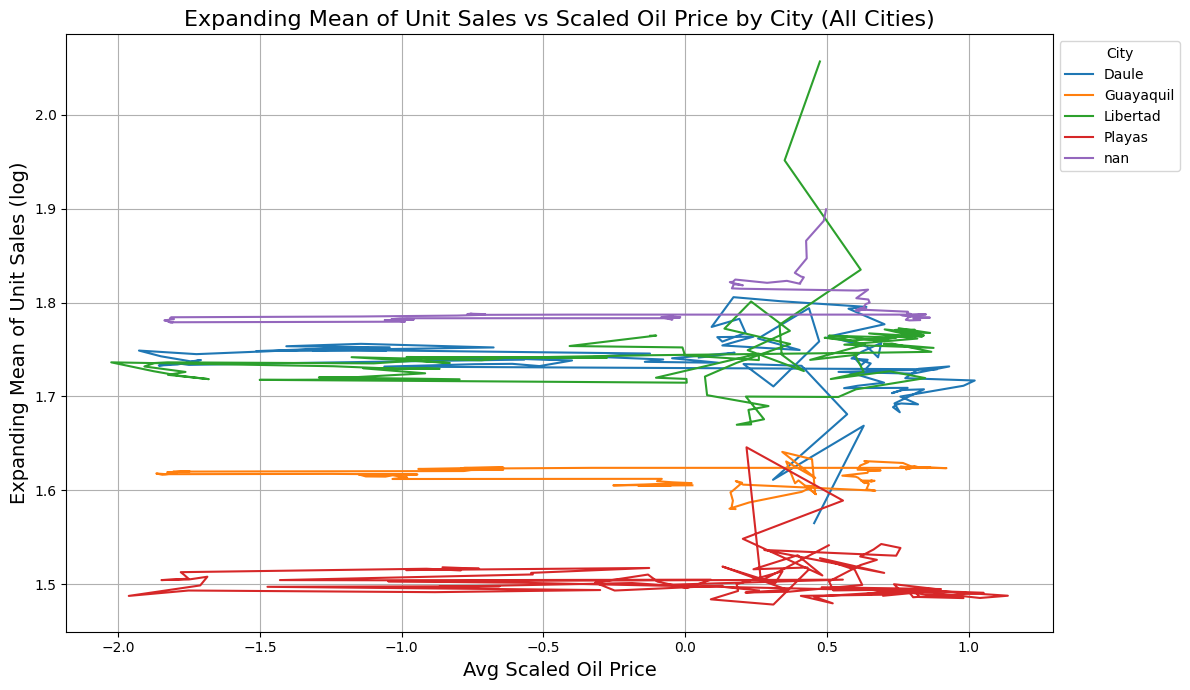

In [ ]:
# 1. Recover 'city' columns (already one-hot encoded)
city_columns = [col for col in df_model.columns if col.startswith('city_')]

# 2. Set up the plot
plt.figure(figsize=(12, 7))

# 3. Loop through each city (include all cities)
for city_col in city_columns:
    # Select only rows where this city is active
    city_data = df_model[df_model[city_col] == 1]

    # Sort by original index (since train_date was hidden)
    city_data = city_data.sort_index()

    # Recover 'train_date' from original df_train
    city_data['train_date'] = df_train.loc[city_data.index, 'train_date']

    # Group by train_date and take **mean** of unit_sales_log
    date_grouped_sales = city_data.groupby('train_date')["unit_sales_log"].mean()

    # Apply expanding **mean** with minimum 3 periods
    expanding_mean_sales = date_grouped_sales.expanding(3).mean()

    # For x-axis: average oil price by date
    date_grouped_oil = city_data.groupby('train_date')["dcoilwtico_scaled"].mean()

    # Match indexes
    common_index = expanding_mean_sales.index.intersection(date_grouped_oil.index)

    # Plot oil price (X-axis) vs expanding mean sales (Y-axis)
    plt.plot(date_grouped_oil.loc[common_index], expanding_mean_sales.loc[common_index], label=city_col.replace('city_', ''))

# 4. Styling
plt.title('Expanding Mean of Unit Sales vs Scaled Oil Price by City (All Cities)', fontsize=16)
plt.xlabel('Avg Scaled Oil Price', fontsize=14)
plt.ylabel('Expanding Mean of Unit Sales (log)', fontsize=14)
plt.legend(title='City', fontsize=10, loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True)
plt.tight_layout()

# 5. Clean up variables if you want (optional)
del city_columns, city_data, date_grouped_sales, expanding_mean_sales, date_grouped_oil, common_index

# Show the plot
plt.show()